In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


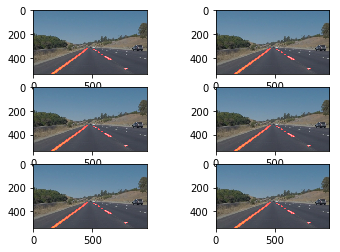

In [2]:


#reading in an image
image = mpimg.imread('test_images/solidYellowCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

#convert picture to gray scale. 
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

#Gaussian Blur
kernal_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernal_size, kernal_size,),0)

#define parameters for Canny to be able to run it
low_threshold = 70
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

#create masked edges
mask = np.zeros_like(edges)
ignore_mask_color = 255

#defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(110,imshape[0]), (imshape[1]/2-25, imshape[0]/2+50), 
                      (imshape[1]/2+2, imshape[0]/2+50), (imshape[1]-20, imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask,vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

#define hough transformation parameters
rho = 2 #distance resolution in pixles
theta = np.pi/180 #angular resolution in pixels
threshold = 20    # minimum number of intersections
min_line_length = 2  #minimum number of of pixles in line
max_line_gap = 2     #maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 

#run hough on edge detected image
# Lines is a array made up of endpoints
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        
#color binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

#draw line on the edge image
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)

#ploting all the images
import os
os.listdir("test_images/")

import glob
paths = glob.glob('test_images/*.jpg')

for i, image_path in enumerate(paths):
#for i in range(6):
    #images = mpimg.imread('test_images/')
    #line_images = np.copy(images)*0
    result = lines_edges
    #resut, final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    plt.subplot(3,2,i+1)
    #os.listdir("test_images/")
    plt.imshow(result)
    
    

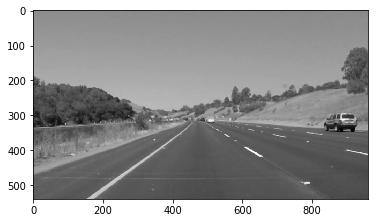

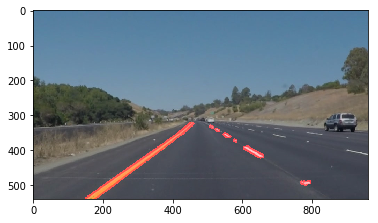

In [59]:
import os
os.listdir("test_images/")




['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

In [ ]:
import glob
paths = glob.glob('test_images/*.jpg')

for i, image_path in enumerate(paths):
#for i in range(6):
    #images = mpimg.imread('test_images/')
    #line_images = np.copy(images)*0
    result = lines_edges
    #resut, final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    plt.subplot(3,2,i+1)
    #os.listdir("test_images/")
    plt.imshow(result)
